In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from keras_vit import vit
from transformers import MaskFormerFeatureExtractor, MaskFormerForInstanceSegmentation
from PIL import Image
import requests
import os
import random
from PIL import Image
import requests
import numpy as np
import matplotlib.pyplot as plt
from transformers import MaskFormerFeatureExtractor, MaskFormerForInstanceSegmentation
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_path = './Bone_Fracture_Binary_Classification1/train'
valid_path = './Bone_Fracture_Binary_Classification1/val'
test_path = './Bone_Fracture_Binary_Classification1/test'

In [ ]:
def load_dataset(path):
    data = {}
    for class_name in os.listdir(path):
        class_path = os.path.join(path, class_name)
        if os.path.isdir(class_path):
            data[class_name] = [os.path.join(class_path, img) for img in os.listdir(class_path)]
    return data

train_data = load_dataset(train_path)
valid_data = load_dataset(valid_path)
test_data = load_dataset(test_path)


### EDA OF THE DATASET

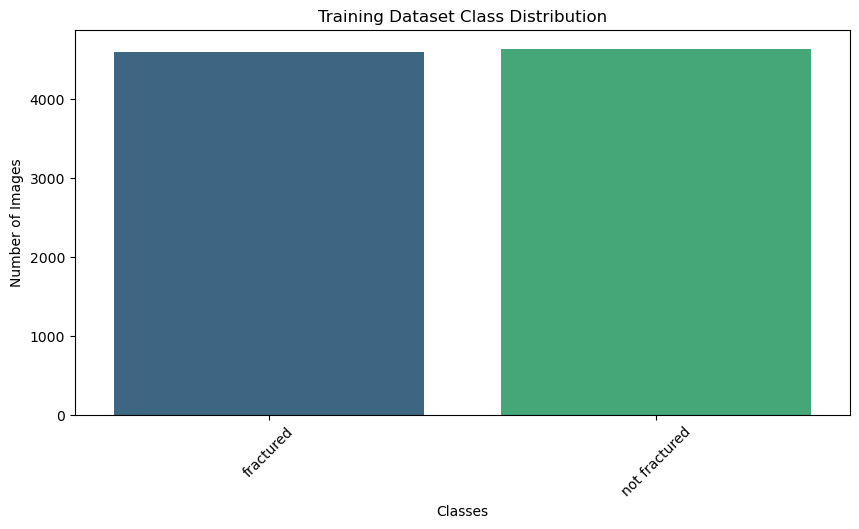

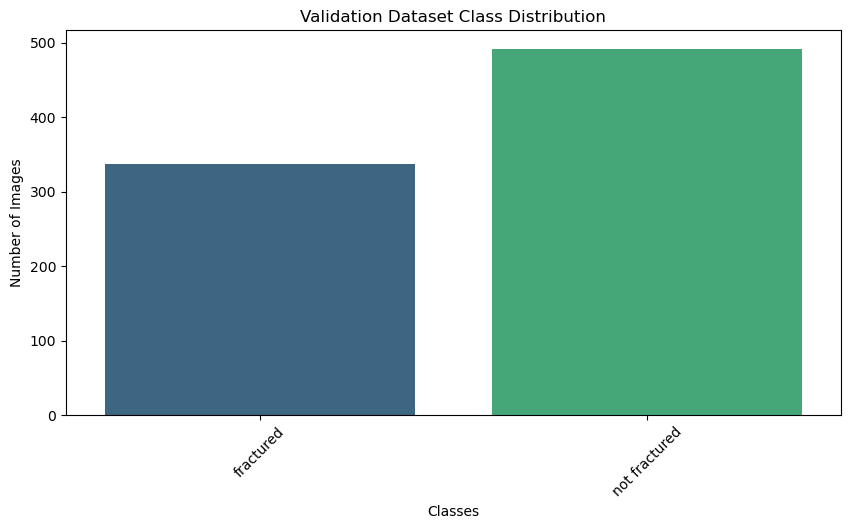

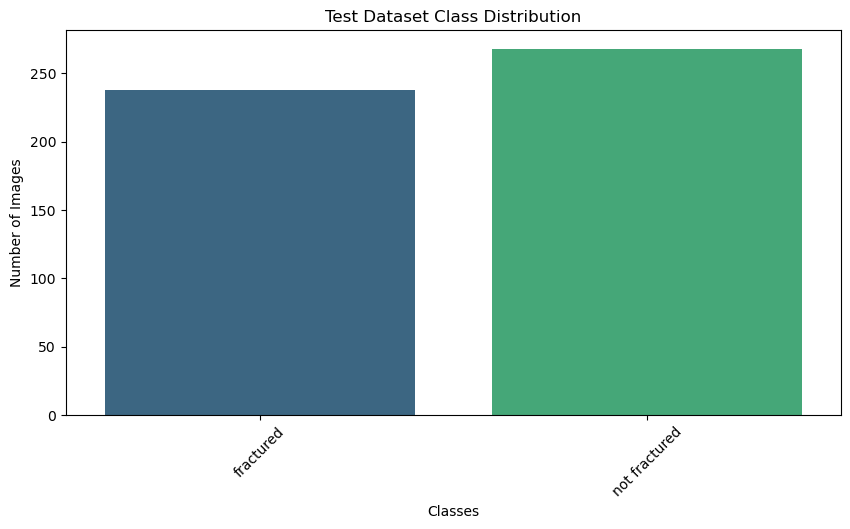

In [ ]:
def plot_class_distribution(data, title):
    class_names = list(data.keys())
    counts = [len(data[class_name]) for class_name in class_names]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=class_names, y=counts, palette='viridis')
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(train_data, 'Training Dataset Class Distribution')
plot_class_distribution(valid_data, 'Validation Dataset Class Distribution')
plot_class_distribution(test_data, 'Test Dataset Class Distribution')


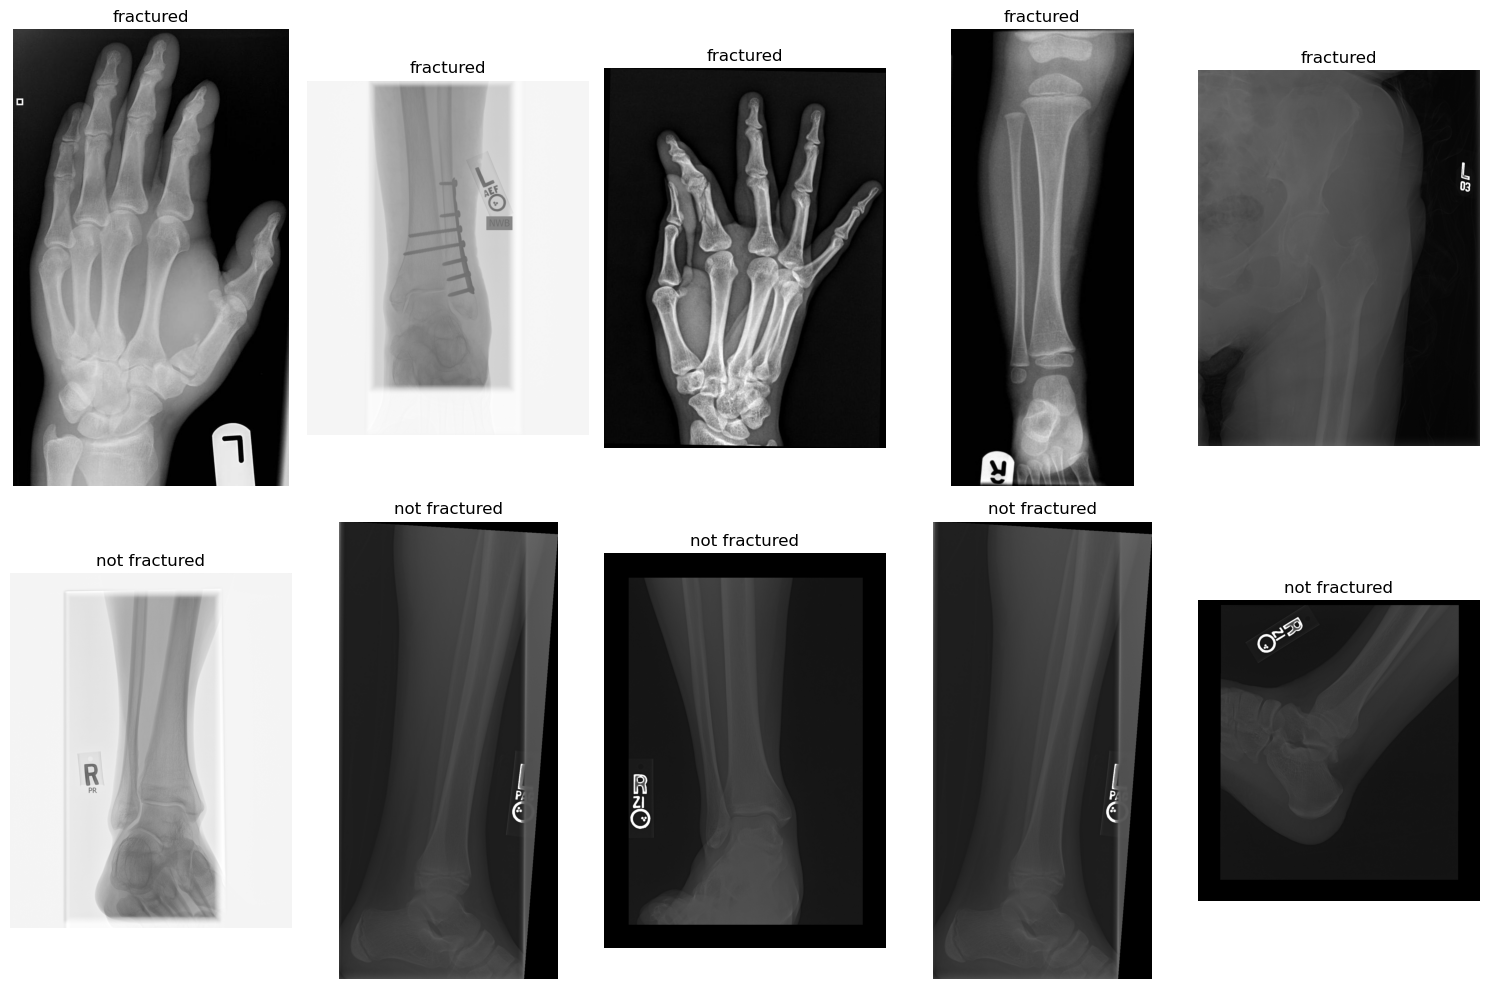

In [ ]:
def display_sample_images(data, n=5):
    class_names = list(data.keys())

    plt.figure(figsize=(15, 10))
    for i, class_name in enumerate(class_names):
        sample_images = data[class_name][:n]
        for j, img_path in enumerate(sample_images):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            plt.subplot(len(class_names), n, i * n + j + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(class_name)
    plt.tight_layout()
    plt.show()

display_sample_images(train_data)


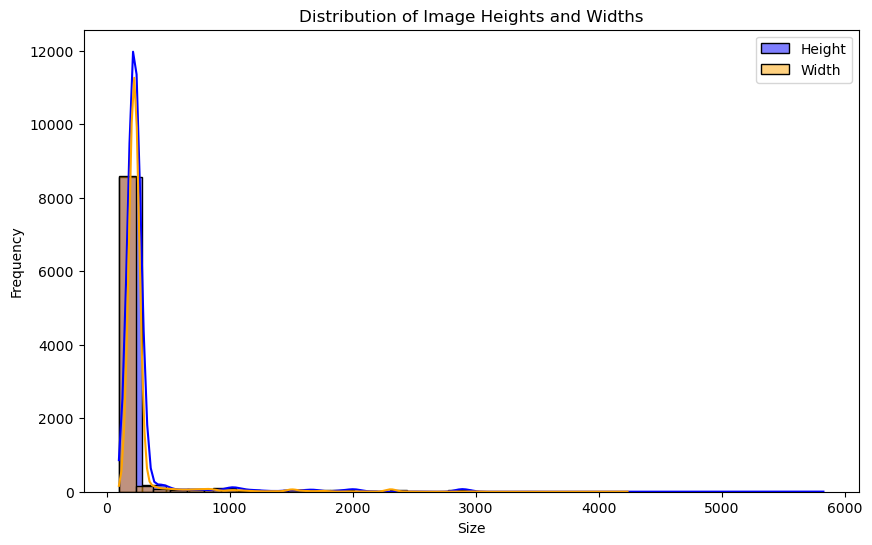

In [ ]:
def analyze_image_sizes(data):
    sizes = []
    for class_name in data.keys():
        for img_path in data[class_name]:
            img = cv2.imread(img_path)
            if img is not None:  # Check if the image was read correctly
                sizes.append(img.shape)  # (height, width, channels)
            else:
                print(f"Warning: Image at path {img_path} could not be read.")
    sizes = np.array(sizes)
    return sizes

sizes = analyze_image_sizes(train_data)

# Plotting the sizes
plt.figure(figsize=(10, 6))
sns.histplot(sizes[:, 0], bins=30, label='Height', color='blue', kde=True)
sns.histplot(sizes[:, 1], bins=30, label='Width', color='orange', kde=True)
plt.title('Distribution of Image Heights and Widths')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.legend()
plt.show()
